<a href="https://colab.research.google.com/github/AbdullahMakhdoom/COVID-19_scrape/blob/master/Customer_Retention_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# download the dataset .csv from github 
!curl -LJO https://raw.githubusercontent.com/CODESTUDIO-GIT/endtoend-ml-projects/master/hr_employee_churn_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  517k  100  517k    0     0  1373k      0 --:--:-- --:--:-- --:--:-- 1370k


In [ ]:
# create dataframe to load dataset
df = pd.read_csv("hr_employee_churn_data.csv")

In [ ]:
df.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [ ]:
# spelling correction 
df.rename(columns = {'average_montly_hours' : 'average_monthly_hours'}, inplace=True)

In [ ]:
df.shape

(14999, 10)

In [ ]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14997.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612863,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,4329.982679,0.248634,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Handling Categorical Features

In [ ]:
df['Work_accident'].unique()

array([0, 1])

In [ ]:
df['promotion_last_5years'].unique()


array([0, 1])

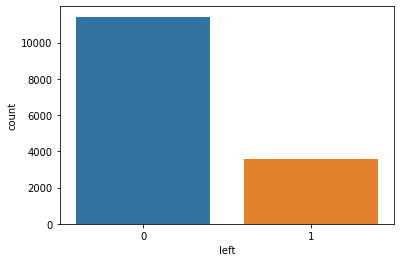

In [ ]:
sns.countplot(x = 'left', data = df)
plt.show()

In the training dataset, less employees have left the organisation. Therefore, a class imbalance exists.

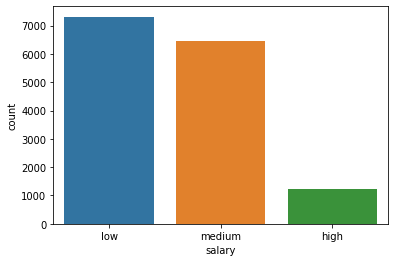

In [ ]:
sns.countplot(x='salary', data = df)

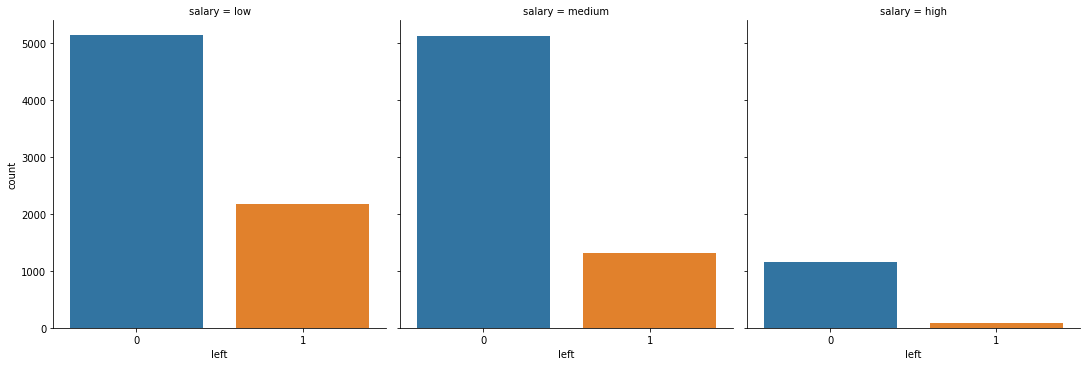

In [ ]:
sns.catplot(x='left', col='salary', kind='count', data=df)

These plots show that 'low salaried' employees have higher churning rate.

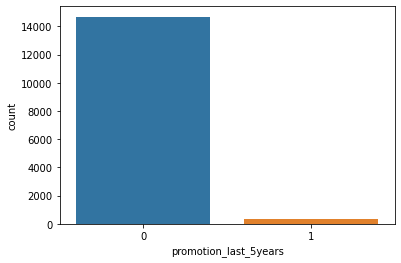

In [ ]:
sns.countplot(x='promotion_last_5years', data=df)

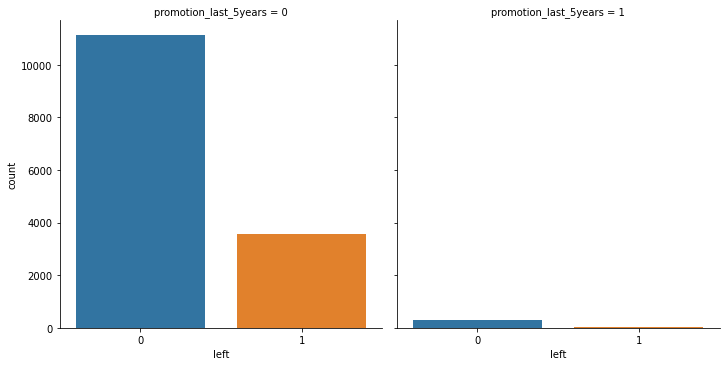

In [ ]:
sns.catplot(x='left', col='promotion_last_5years', kind='count', data=df)


Employees who did not get promoted have higher churning rate, as expected.

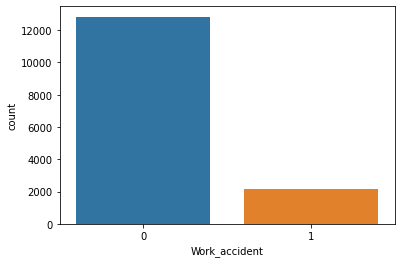

In [ ]:
sns.countplot(x='Work_accident', data=df)

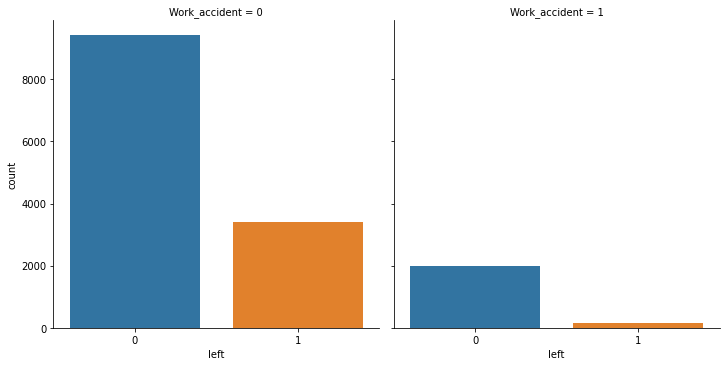

In [ ]:
sns.catplot(x='left', col='Work_accident', kind='count', data=df)

From the count plots above, it does not seem that 'work_accident' feauture has an effect on employees leaving the organization.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


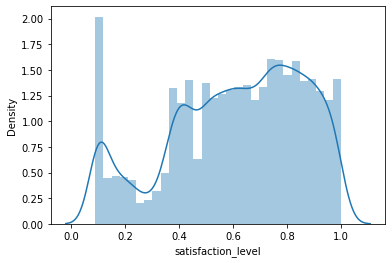

In [ ]:
# univariate distribution 
sns.distplot(df['satisfaction_level'])

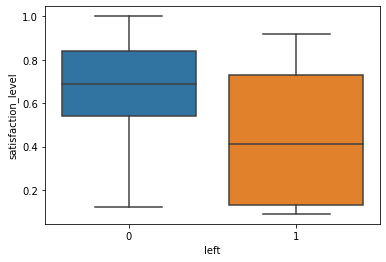

In [ ]:
sns.boxplot(x='left', y='satisfaction_level', data=df)

Employees who left the organization have lower range of 'satisfaction_left'.

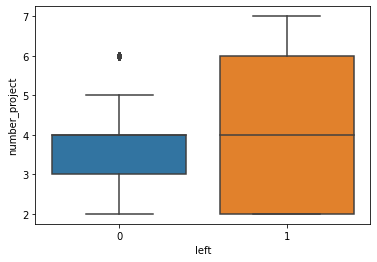

In [ ]:
sns.boxplot(x='left', y='number_project', data=df)


50% of Employees left when number_projects is between 3-4.
The dot outside the wishker at number_project = 6 is an outlier.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


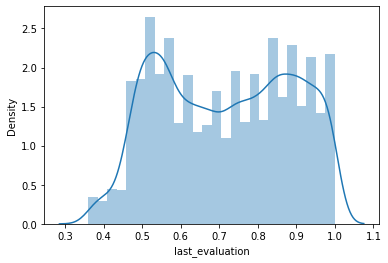

In [ ]:
sns.distplot(df['last_evaluation'])

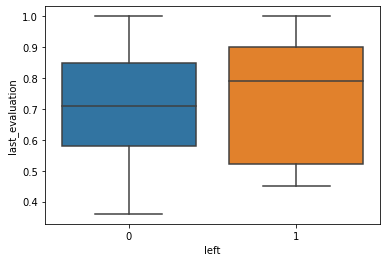

In [ ]:
sns.boxplot(x='left', y='last_evaluation', data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


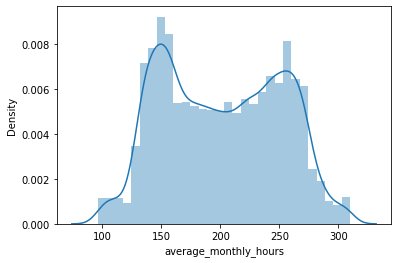

In [ ]:
sns.distplot(df['average_monthly_hours'])

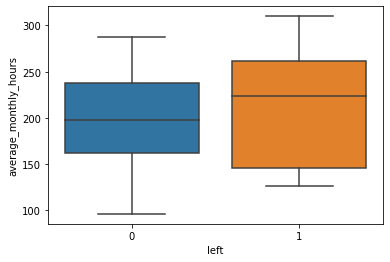

In [ ]:
sns.boxplot(x= "left", y="average_monthly_hours", data=df)

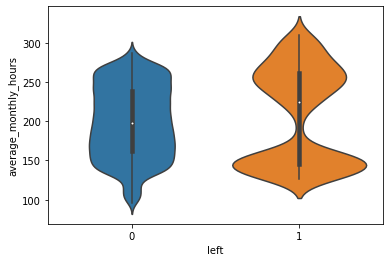

In [ ]:
# A more visually rich plot that combines the denisty distribution with box plot
sns.violinplot(x= "left", y="average_monthly_hours", data=df)